In [7]:
!pip install imblearn

In [80]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split #for the splitting of the test and train data
from sklearn.preprocessing import StandardScaler, LabelEncoder #feature scaling
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import f1_score #evaluation 

In [9]:
df = pd.read_csv("../assets/data/2019-UT-ASD-Full/2019-UT-ASD-scrapped.csv")

In [10]:
df.head()

,Unnamed: 0,Date,RideId,TrainId,DepartureStation,DepartureTime,DepartureDelay,DestinationStation,ArrivalTime,ArrivalDelay,...,rdt_station_names,rdt_station_codes,cause_nl,cause_en,statistical_cause_nl,statistical_cause_en,cause_group,start_time,end_time,duration_minutes
0,0,2018-12-31,1405,1405,Utrecht Centraal,01:01,1.0,Amsterdam Centraal,01:29,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018-12-31,1402,1402,Amsterdam Centraal,01:18,0.0,Utrecht Centraal,01:53,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019-01-01,1409,1409,Utrecht Centraal,02:17,0.0,Amsterdam Centraal,02:44,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018-12-31,1406,1406,Amsterdam Centraal,02:19,1.5,Utrecht Centraal,02:45,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019-01-01,1413,1413,Utrecht Centraal,03:11,0.0,Amsterdam Centraal,03:44,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


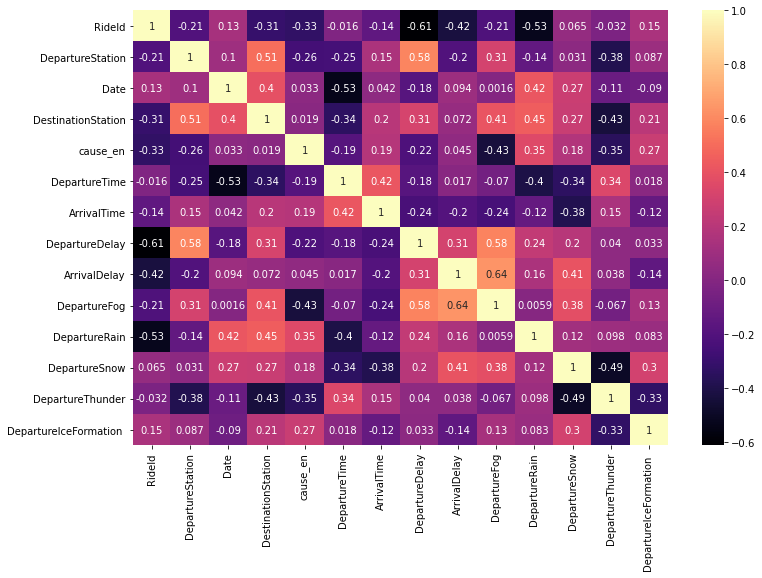

In [11]:
plt.figure(figsize=(12, 8))
df_temp = df.copy()
Index= ['RideId',	'DepartureStation',	'Date',	'DestinationStation',	'cause_en',	'DepartureTime',	'ArrivalTime',	'DepartureDelay',	'ArrivalDelay',	'DepartureFog',	'DepartureRain',	'DepartureSnow',	'DepartureThunder',	'DepartureIceFormation ']
Cols = ['RideId',	'DepartureStation',	'Date',	'DestinationStation',	'cause_en',	'DepartureTime',	'ArrivalTime',	'DepartureDelay',	'ArrivalDelay',	'DepartureFog',	'DepartureRain',	'DepartureSnow',	'DepartureThunder',	'DepartureIceFormation ']
df_temp = DataFrame(abs(np.random.randn(14, 14)), index=Index, columns=Cols)

sns.heatmap(df_temp.corr(), annot=True, cmap = 'magma')
plt.show()

In [12]:
feature_list = ['RideId','DepartureStation','Date','DestinationStation', 'cause_en', 'DepartureTime', 'ArrivalTime', 'ArrivalDelay']

In [13]:
df[feature_list].isna().sum()

RideId                    0
DepartureStation        930
Date                      0
DestinationStation     1073
cause_en              62292
DepartureTime           940
ArrivalTime            1073
ArrivalDelay              0
dtype: int64

In [14]:
df['HasMaintanence'] = df['cause_en'].apply(lambda cause: True if cause == 'engineering work' else False)

In [15]:
df.drop(columns=['cause_en'], inplace=True)

In [16]:
feature_list = ['RideId','DepartureStation','Date','DestinationStation', 'HasMaintanence', 'DepartureTime', 'ArrivalTime', 'ArrivalDelay']

In [17]:
df[feature_list].isna().sum()

RideId                   0
DepartureStation       930
Date                     0
DestinationStation    1073
HasMaintanence           0
DepartureTime          940
ArrivalTime           1073
ArrivalDelay             0
dtype: int64

In [18]:
feature_df = df[feature_list]

In [19]:
feature_df.isna().sum()

RideId                   0
DepartureStation       930
Date                     0
DestinationStation    1073
HasMaintanence           0
DepartureTime          940
ArrivalTime           1073
ArrivalDelay             0
dtype: int64

In [20]:
feature_df.dropna(inplace=True)

<ipython-input-20-2a7612a683b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df.dropna(inplace=True)


In [21]:
feature_df.head()

,RideId,DepartureStation,Date,DestinationStation,HasMaintanence,DepartureTime,ArrivalTime,ArrivalDelay
0,1405,Utrecht Centraal,2018-12-31,Amsterdam Centraal,False,01:01,01:29,1.5
1,1402,Amsterdam Centraal,2018-12-31,Utrecht Centraal,False,01:18,01:53,0.0
2,1409,Utrecht Centraal,2019-01-01,Amsterdam Centraal,False,02:17,02:44,1.0
3,1406,Amsterdam Centraal,2018-12-31,Utrecht Centraal,False,02:19,02:45,0.0
4,1413,Utrecht Centraal,2019-01-01,Amsterdam Centraal,False,03:11,03:44,0.0


In [22]:
feature_df.dtypes

RideId                  int64
DepartureStation       object
Date                   object
DestinationStation     object
HasMaintanence           bool
DepartureTime          object
ArrivalTime            object
ArrivalDelay          float64
dtype: object

# Preparing Data For Training

In [23]:
encoder = LabelEncoder()

In [24]:
feature_df['DepartureStation'].unique()

array(['Utrecht Centraal', 'Amsterdam Centraal'], dtype=object)

In [25]:
feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
feature_df['DestinationStation'] = encoder.fit_transform(feature_df['DestinationStation'])

<ipython-input-25-7937afe1ee27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DepartureStation'] = encoder.fit_transform(feature_df['DepartureStation'])
<ipython-input-25-7937afe1ee27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DestinationStation'] = encoder.fit_transform(feature_df['DestinationStation'])


In [26]:
feature_df['Date'] = pd.to_datetime(feature_df['Date'])

<ipython-input-26-7e522f715bcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Date'] = pd.to_datetime(feature_df['Date'])


In [27]:
feature_df['Month'] = feature_df['Date'].dt.month
feature_df['Day'] = feature_df['Date'].dt.dayofweek
feature_df['DepartureTime'] = pd.to_datetime(feature_df['DepartureTime']).dt.hour
feature_df['ArrivalTime'] = pd.to_datetime(feature_df['ArrivalTime']).dt.hour

<ipython-input-27-2d8933329e59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Month'] = feature_df['Date'].dt.month
<ipython-input-27-2d8933329e59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['Day'] = feature_df['Date'].dt.dayofweek
<ipython-input-27-2d8933329e59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [28]:
feature_df.pop('Date')

0        2018-12-31
1        2018-12-31
2        2019-01-01
3        2018-12-31
4        2019-01-01
            ...    
111263   2019-12-31
111264   2019-12-31
111265   2019-12-31
111266   2019-12-31
111267   2019-12-31
Name: Date, Length: 110193, dtype: datetime64[ns]

In [29]:
feature_df.dtypes

RideId                  int64
DepartureStation        int32
DestinationStation      int32
HasMaintanence           bool
DepartureTime           int64
ArrivalTime             int64
ArrivalDelay          float64
Month                   int64
Day                     int64
dtype: object

In [30]:
def apply_delay_category(delay):
    if delay < 1:
        return 'No Delay'
    if delay < 5:
        return '<5'
    if delay < 10:
        return '<10'
    if delay < 15:
        return '<15'
    if delay < 20:
        return '<20'
    if delay < 25:
        return '<25'
    return '>25'

In [31]:
feature_df['DelayCategory'] = feature_df['ArrivalDelay'].apply(lambda delay: apply_delay_category(delay))

<ipython-input-31-264a3505c4aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DelayCategory'] = feature_df['ArrivalDelay'].apply(lambda delay: apply_delay_category(delay))


In [32]:
feature_df.drop(columns=['ArrivalDelay'], inplace=True)

C:\Users\Zhaklin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
feature_df['DelayCategory'].unique()

array(['<5', 'No Delay', '<10', '<15', '<20', '>25', '<25'], dtype=object)

In [34]:
feature_df['DelayCategory'] = encoder.fit_transform(feature_df['DelayCategory'])

<ipython-input-34-f81ee0240815>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_df['DelayCategory'] = encoder.fit_transform(feature_df['DelayCategory'])


In [35]:
feature_df['DelayCategory'].unique()

array([4, 6, 0, 1, 2, 5, 3])

In [36]:
y = feature_df.pop('DelayCategory')
X = feature_df

In [37]:
y

0         4
1         6
2         4
3         6
4         6
         ..
111263    4
111264    4
111265    6
111266    6
111267    4
Name: DelayCategory, Length: 110193, dtype: int32

In [38]:
#devide the dataset into training and testing data (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [39]:
numeric_features = feature_df.select_dtypes(include=[np.number])
#df = df.select_dtypes(include=[np.number])

In [40]:
numeric_features.columns

Index(['RideId', 'DepartureStation', 'DestinationStation', 'DepartureTime',
       'ArrivalTime', 'Month', 'Day'],
      dtype='object')

In [41]:
columns = feature_df.columns.tolist()
columns = [c for c in columns if c not in ['Date']]

# Feature Scaling

In [42]:
feature_df['DepartureStation'].unique()

array([1, 0])

In [95]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training the Algorithm

In [96]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(sampling_strategy='not majority', categorical_features = [0,1,2,3,4,5,6])

In [97]:
rfr = RandomForestRegressor(n_estimators=20, random_state=0)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

# Evaluating the Algorithm

In [105]:
import statsmodels.api as sm 
model = sm.OLS(y, X).fit() 
model.bse 

array([0.00203375, 0.00178759])

In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6945311429569094
Mean Squared Error: 1.6569221879115057
Root Mean Squared Error: 1.2872148957775098


In [99]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.69 degrees.


In [100]:
#Random forest determined feature importances
rfr.feature_importances_  #rideid/month/day

array([0.20562631, 0.01422135, 0.01602197, 0.        , 0.08506345,
       0.07824773, 0.32649602, 0.27432317])

In [102]:
prediction = rfr.predict(X_test)

In [103]:
df = pd.DataFrame({'True': y_test, 'pred' : prediction})

In [104]:
df

,True,pred
53230,6,6.000000
56343,6,4.383075
99606,6,6.000000
32746,6,6.000000
98984,6,3.522500
...,...,...
77065,6,6.000000
83073,6,6.000000
8837,5,4.212857
90186,6,6.000000
